In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# 读入数据

         Date        High         Low        Open       Close     Volume  \
0  2010-01-04  129.226151  127.205109  129.226151  127.678436  5896979.0   
1  2010-01-05  128.850494  126.972198  128.467316  127.302780  4194404.0   
2  2010-01-06  127.347855  124.951164  126.964691  125.289253  5309229.0   
3  2010-01-07  125.612320  121.622841  125.289253  123.005257  6498680.0   
4  2010-01-08  123.215630  120.285500  123.215630  121.712997  4885048.0   

    Adj Close  
0  105.634399  
1  105.323608  
2  103.657715  
3  101.768059  
4  100.698906  


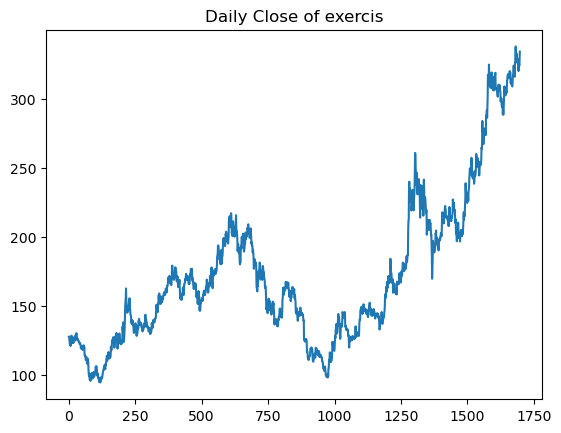

In [2]:
# 读入数据
data = pd.read_csv('E:\毕设文件\DeepLearning\Time_Series\data\experiment_01\data-stock_train.csv')
# 查看数据
print(data.head())
# 截取有需要的数据
data = data[[
    'High',
    'Low',
    'Open',
    'Close',
    'Volume',
    'Adj Close'
]]
# 更改数据格式类型
data = data.astype(float)
#绘图
plt.plot(data['Close'])
plt.title('Daily Close of exercis')
plt.show()

# 对数据进行预处理填充0数据的同时取除Na数据

            High         Low        Open       Close     Volume   Adj Close
4     123.215630  120.285500  123.215630  121.712997  4885048.0  100.698906
5     123.891808  120.586021  122.915100  121.179565  3255763.0  100.257576
6     124.845978  120.668671  121.299774  124.455299  4134538.0  102.967743
7     124.079636  120.961685  123.208115  121.292259  5047742.0  100.350800
8     127.122467  121.712997  121.712997  126.626595  6183112.0  104.764153
...          ...         ...         ...         ...        ...         ...
1693  324.989990  316.200012  319.029999  324.480011  2600143.0  306.992828
1694  328.799988  323.500000  324.510010  326.160004  2006229.0  308.582214
1695  328.000000  323.329987  326.989990  323.720001  1787811.0  306.273712
1696  327.869995  323.000000  324.000000  327.309998  2122512.0  309.670227
1697  335.290009  326.609985  326.609985  334.149994  3468767.0  316.141602

[1694 rows x 6 columns]


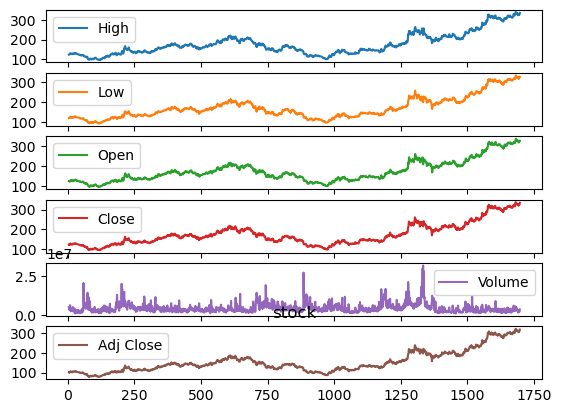

In [3]:
# 由于前4条数据特征全部为0所以舍弃数据，进行切片操纵
data = data.iloc[4:]
# 对数据进行0填充
data = data.mask(data==0).fillna(method='ffill')
print(data)
draw_data = data[[
    'High',
    'Low',
    'Open',
    'Close',
    'Volume',
    'Adj Close'
]]
# 绘制数据分布
draw_data.plot(subplots=True)
plt.title('stock')
plt.savefig('stocks.png')
plt.show()


# 模型平稳性评估
显然我们可以看到上述图标中 时间序列并不是平稳的，接下来对时间序列的数据进行平稳性分析
本实验以High值进行时间序列预测

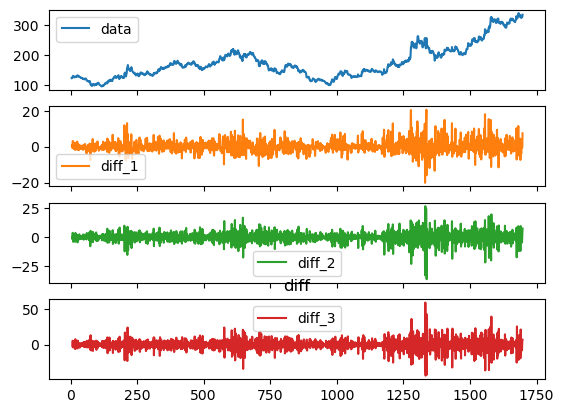

,High,Low,Open,Close,Volume,Adj Close,data,diff_1,diff_2,diff_3
4,123.215630,120.285500,123.215630,121.712997,4885048.0,100.698906,123.215630,NaN,NaN,NaN
5,123.891808,120.586021,122.915100,121.179565,3255763.0,100.257576,123.891808,0.676178,NaN,NaN
6,124.845978,120.668671,121.299774,124.455299,4134538.0,102.967743,124.845978,0.954170,0.277992,NaN
7,124.079636,120.961685,123.208115,121.292259,5047742.0,100.350800,124.079636,-0.766342,-1.720512,-1.998505
8,127.122467,121.712997,121.712997,126.626595,6183112.0,104.764153,127.122467,3.042831,3.809174,5.529686
...,...,...,...,...,...,...,...,...,...,...
1693,324.989990,316.200012,319.029999,324.480011,2600143.0,306.992828,324.989990,0.489990,4.449982,7.579956
1694,328.799988,323.500000,324.510010,326.160004,2006229.0,308.582214,328.799988,3.809998,3.320007,-1.129974
1695,328.000000,323.329987,326.989990,323.720001,1787811.0,306.273712,328.000000,-0.799988,-4.609985,-7.929993
1696,327.869995,323.000000,324.000000,327.309998,2122512.0,309.670227,327.869995,-0.130005,0.669983,5.279968


In [4]:
# 新增列对数据进行差分处理
data['data'] =  data['High']
data['diff_1'] =data['data'].diff(1)
data['diff_2'] = data['diff_1'].diff(1)
data['diff_3'] = data['diff_2'].diff(1)
# 绘图看数据变化情况
draw_data = data[[
    'data',
    'diff_1',
    'diff_2',
    'diff_3'
]]
# 绘制图像
draw_data.plot(subplots=True)
plt.title('diff')
plt.savefig('diff.png')
plt.show()
data

# 差分分析
通过差分操作我们可以看到随着差分次数的提升模型的平稳性得到了显著的提升
在经过第三次差分后，数据平稳性显著下降

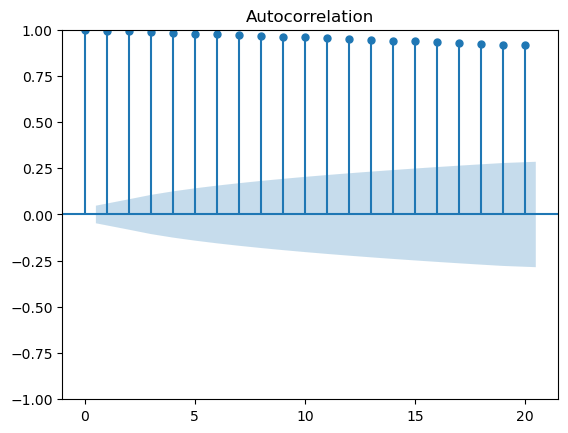

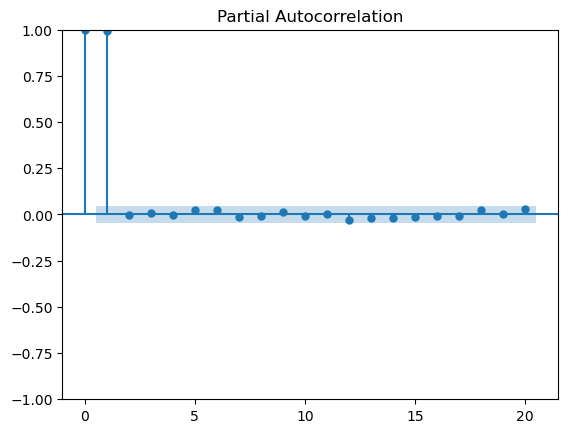

原始数据:       lb_stat  lb_pvalue
1  1680.69599        0.0


In [5]:
# 绘制原始数据
plot_acf(data['data'].iloc[1:],lags=20)
plot_pacf(data['data'].iloc[1:],lags=20)
plt.show()
print('原始数据:',acorr_ljungbox(data['data'].iloc[1:],lags=1))

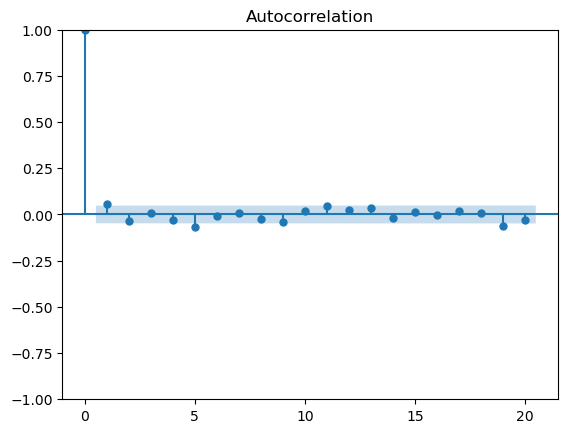

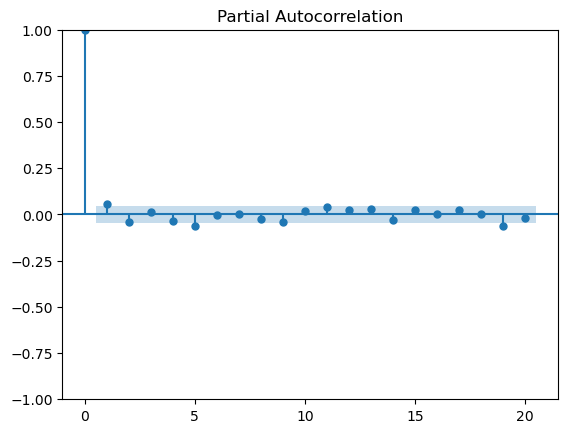

一阶差分:     lb_stat  lb_pvalue
1  5.872401    0.01538


In [6]:

# 绘制一阶差分图
plot_acf(data['diff_1'].iloc[1:],lags=20)
plot_pacf(data['diff_1'].iloc[1:],lags=20)
plt.show()
print('一阶差分:',acorr_ljungbox(data['diff_1'].iloc[1:],lags=1))


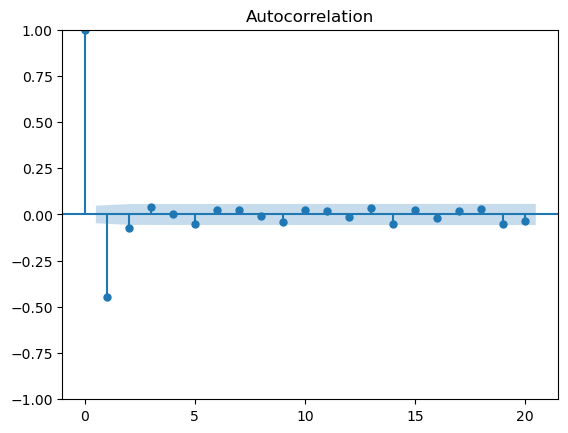

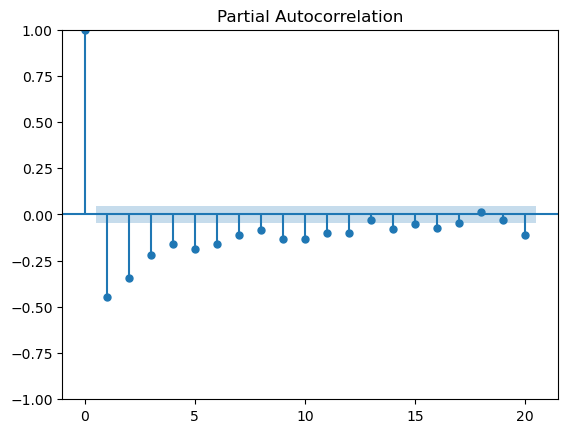

二阶差分:       lb_stat     lb_pvalue
1  341.529226  2.963703e-76


In [7]:
# 绘制二阶差分图
plot_acf(data['diff_2'].iloc[2:],lags=20)
plot_pacf(data['diff_2'].iloc[2:],lags=20)
plt.show()
print('二阶差分:',acorr_ljungbox(data['diff_2'].iloc[2:],lags=1))

# 结果分析
原始数据 acf 缓慢拖尾 pacf2阶截尾
1阶差分 acf 1阶截尾  pacf1阶截尾
2阶差分 acf 2阶截尾 pacf缓慢拖尾

且数据p<0.05 均为非白噪声序列

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
# 截取部分数据
data_df = data.iloc[2:200].copy()
aicVal = []
# print(data_df)
# 对参数进行便利测试
for ari in range(1,3):
    for maj in range(1,6):
        try:
            # 生成模型并训练
            arma_obj = sm.tsa.arima.ARIMA(data_df.High.tolist(),order=(ari,0,maj)).fit(method='innovations_mle')
            # print(arma_obj.summary())
            # 结果评估
            aicVal.append([ari,maj,arma_obj.aic])

        except Exception as e:
            print(e)
# 显示结果
print(aicVal)
# 对数据进行ADF检验
print('原始数据数据ADF检验：',sm.tsa.stattools.adfuller(data_df.High))
print('diff_1数据数据ADF检验：',sm.tsa.stattools.adfuller(data_df.diff_1))
print('diff_2数据数据ADF检验：',sm.tsa.stattools.adfuller(data_df.diff_2))

[[1, 1, 837.9086812859305], [1, 2, 839.2763043942414], [1, 3, 840.8018903843174], [1, 4, 842.7347897538756], [1, 5, 843.7506888836684], [2, 1, 838.7691651024318], [2, 2, 840.7468034890819], [2, 3, 842.6691587582804], [2, 4, 843.6632806357578], [2, 5, 845.7438012408376]]
原始数据数据ADF检验： (-0.638714738448779, 0.861991970589534, 0, 197, {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}, 771.7202285716941)
diff_1数据数据ADF检验： (-12.74965094990279, 8.589313613429472e-24, 0, 197, {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}, 770.4706372725461)
diff_2数据数据ADF检验： (-6.329491557392013, 2.9301393625260718e-08, 15, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, 785.207170417109)


对原始数据进行ADF检验后可见P值显著大于0.05所以拒绝假设即模型是不稳定的
而diff_1 和 diff_2是稳定的
可见ARMA模型重 2,2参数性能最优使用此参数进行后续实验
# ARMA模型实验结果

ARMA模型的AIC值: 840.1054976348041


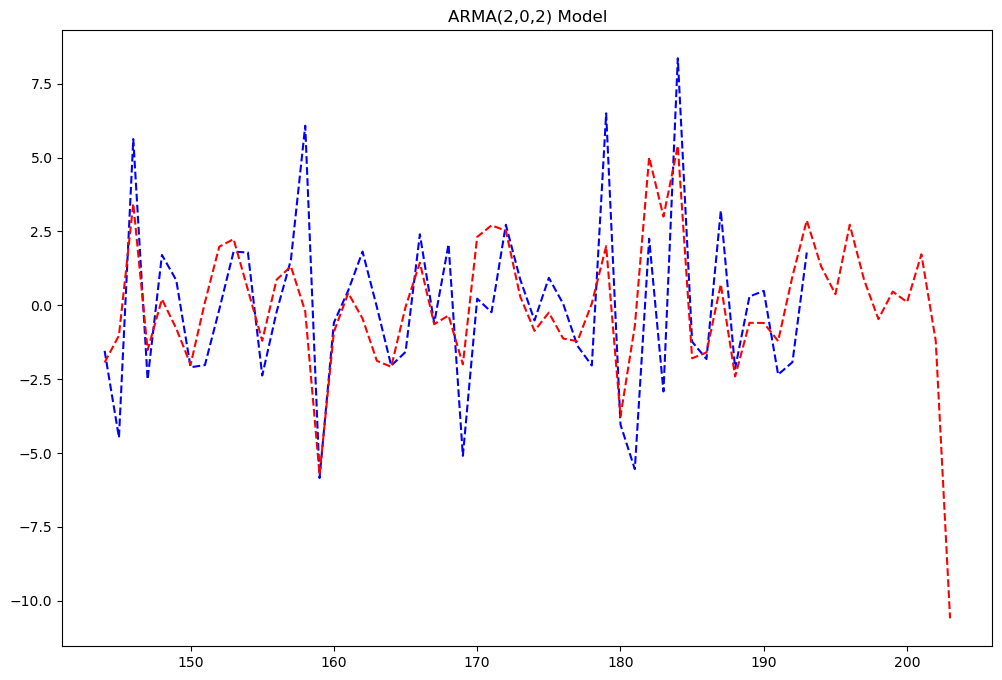

In [9]:
# 拟合ARMA模型
arma_obj = sm.tsa.arima.ARIMA(data_df.diff_2, order=(2, 0, 2)).fit(method='innovations_mle')

# 使用拟合的模型进行未来值的预测，并将预测值存储在data_df中
data_df['ARMA'] = arma_obj.predict()

# 打印ARMA模型的AIC值，用于模型评估
print("ARMA模型的AIC值:", arma_obj.aic)

# 创建一个图形窗口
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(12, 8)

# 绘制原始数据的一部分（从len(data_df)-60到末尾）和ARMA模型的预测值
data_df['diff_2'].iloc[len(data_df)-60 :-10].plot(color='b', linestyle='--', ax=axarr)
data_df['ARMA'].iloc[len(data_df)-60 :].plot(color='r', linestyle='--', ax=axarr)

# 设置图形标题
axarr.set_title('ARMA(2,0,2) Model')

# 显示图形
plt.show()

# AR模型

AR模型的AIC值: 908.4419636026169


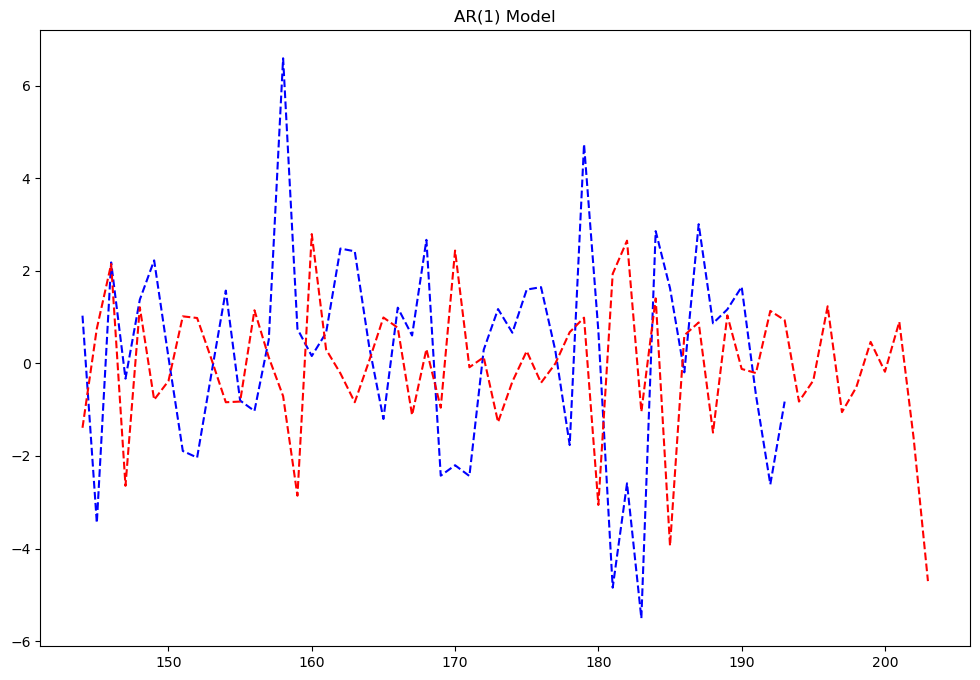

In [10]:
# 拟合AR模型
ar_obj = sm.tsa.arima.ARIMA(data_df.diff_2, order=(1, 0, 0)).fit()

# 使用拟合的AR模型进行未来值的预测，并将预测值存储在data_df中
data_df['AR'] = ar_obj.predict(end=len(data_df) + 10)

# 打印AR模型的AIC值，用于模型评估
print("AR模型的AIC值:", ar_obj.aic)

# 创建一个图形窗口
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(12, 8)

# 绘制原始数据的一部分（从len(data_df)-60到末尾）和AR模型的预测值
data_df['diff_1'].iloc[len(data_df)-60 :-10].plot(color='b', linestyle='--', ax=axarr)
data_df['AR'].iloc[len(data_df)-60 :].plot(color='r', linestyle='--', ax=axarr)

# 设置图形标题
axarr.set_title('AR(1) Model')

# 显示图形
plt.show()

# MA模型

MA模型的AIC值: 837.4871892137077


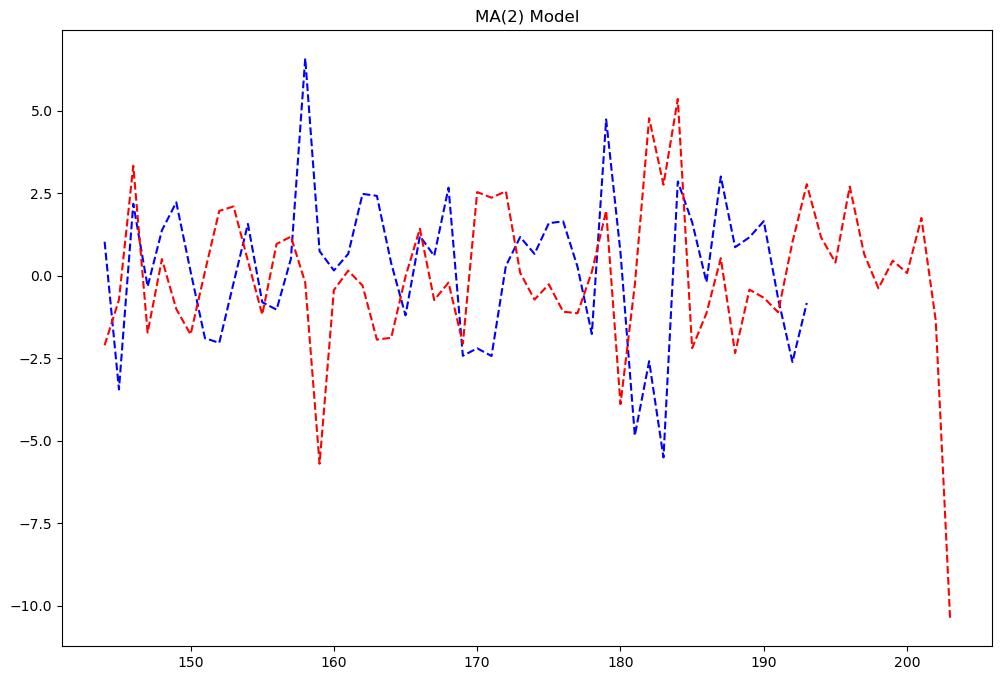

In [12]:

# 拟合MA模型
ma_obj = sm.tsa.arima.ARIMA(data_df.diff_2, order=(0, 0, 2)).fit(method='innovations_mle')

# 使用拟合的MA模型进行未来值的预测，并将预测值存储在data_df中
data_df['MA'] = ma_obj.predict(end=len(data_df) + 10)

# 打印MA模型的AIC值，用于模型评估
print("MA模型的AIC值:", ma_obj.aic)

# 创建一个图形窗口
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(12, 8)

# 绘制原始数据的一部分（从len(data_df)-60到末尾）和MA模型的预测值
data_df['diff_1'].iloc[len(data_df)-60 :-10].plot(color='b', linestyle='--', ax=axarr)
data_df['MA'].iloc[len(data_df)-60 :].plot(color='r', linestyle='--', ax=axarr)

# 设置图形标题
axarr.set_title('MA(2) Model')

# 显示图形
plt.show()


# 对比AR、MA、ARMA
见ARIMA.ipynb 总结比较